## **Part 1: Data Exploration and Preprocessing**

**Step 1: Load the dataset and display the first few rows**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_data = pd.read_csv(url)
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


**Step 2: Visualize the distribution of key features**

We'll use seaborn and matplotlib for visualization.

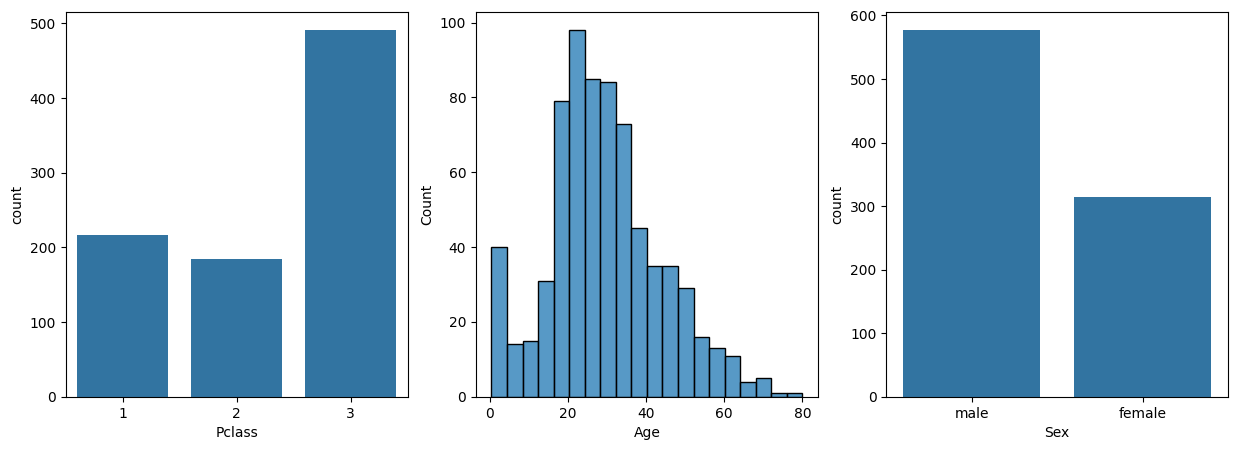

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distribution of 'Pclass', 'Age', 'Sex'
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(data=titanic_data, x='Pclass', ax=ax[0])
sns.histplot(data=titanic_data, x='Age', bins=20, ax=ax[1])
sns.countplot(data=titanic_data, x='Sex', ax=ax[2])
plt.show()


**Step 3: Check for missing values and outliers**

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


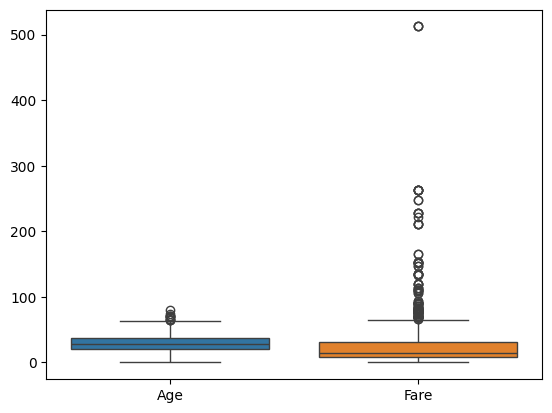

In [3]:
# Check for missing values
print(titanic_data.isnull().sum())

# Identify outliers using boxplot for numerical features
sns.boxplot(data=titanic_data[['Age', 'Fare']])
plt.show()


## **Step 4: Data Preprocessing**
**Step 4.1: Handle missing values**

In [6]:
# Fill missing values in 'Age' with the median
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Drop rows where 'Embarked' is missing
titanic_data.dropna(subset=['Embarked'], inplace=True)

# Fill missing 'Fare' values with median
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)


**Step 4.2: Encode categorical variables**

In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Sex' and 'Embarked' columns
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])


**Step 4.3: Standardize/Normalize numerical features**

We will standardize Age and Fare using StandardScaler.

In [9]:
from sklearn.preprocessing import StandardScaler

# Standardize 'Age' and 'Fare'
scaler = StandardScaler()
titanic_data[['Age', 'Fare']] = scaler.fit_transform(titanic_data[['Age', 'Fare']])

print(titanic_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    1 -0.563674      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.669217      1   
2                             Heikkinen, Miss. Laina    0 -0.255451      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.438050      1   
4                           Allen, Mr. William Henry    1  0.438050      0   

   Parch            Ticket      Fare Cabin  Embarked  
0      0         A/5 21171 -0.500240   NaN         2  
1      0          PC 17599  0.788947   C85         0  
2      0  STON/O2. 3101282 -0.486650   NaN         2  
3      0            113803  0.422861  C123         2  
4      0            373450 -0.484133   

## **Part 2: Implementing k-NN and Decision Trees**
**Step 5: Split the dataset into training and testing sets**

In [10]:
from sklearn.model_selection import train_test_split

# Select features and target variable
X = titanic_data[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
y = titanic_data['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**Step 6: Implement k-NN algorithm**

We will implement the k-NN model using KNeighborsClassifier.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train k-NN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test data
y_pred_knn = knn.predict(X_test)

# Evaluate k-NN model performance
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

print(f"k-NN Accuracy: {knn_accuracy}")
print(f"k-NN Precision: {knn_precision}")
print(f"k-NN Recall: {knn_recall}")
print(f"k-NN F1 Score: {knn_f1}")


k-NN Accuracy: 0.7940074906367042
k-NN Precision: 0.7227722772277227
k-NN Recall: 0.73
k-NN F1 Score: 0.7263681592039801


**Step 7: Implement Decision Tree algorithm**

Now, we implement the Decision Tree model using DecisionTreeClassifier.

In [12]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict on test data
y_pred_tree = decision_tree.predict(X_test)

# Evaluate Decision Tree performance
tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_precision = precision_score(y_test, y_pred_tree)
tree_recall = recall_score(y_test, y_pred_tree)
tree_f1 = f1_score(y_test, y_pred_tree)

print(f"Decision Tree Accuracy: {tree_accuracy}")
print(f"Decision Tree Precision: {tree_precision}")
print(f"Decision Tree Recall: {tree_recall}")
print(f"Decision Tree F1 Score: {tree_f1}")


Decision Tree Accuracy: 0.7677902621722846
Decision Tree Precision: 0.69
Decision Tree Recall: 0.69
Decision Tree F1 Score: 0.69


## **Part 3: Visualization**
**Step 8: Visualize decision boundaries**

We will visualize decision boundaries using two features, e.g., Age and Fare.

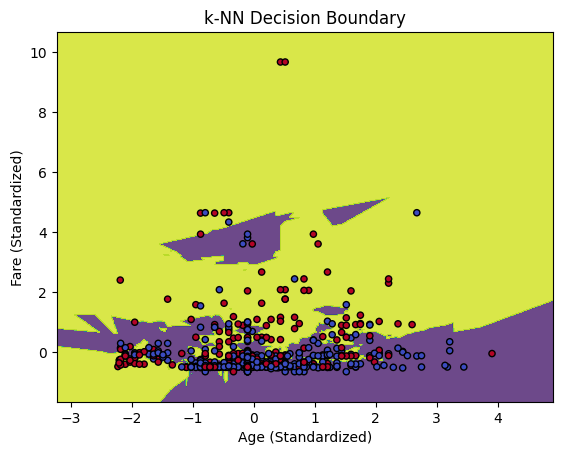

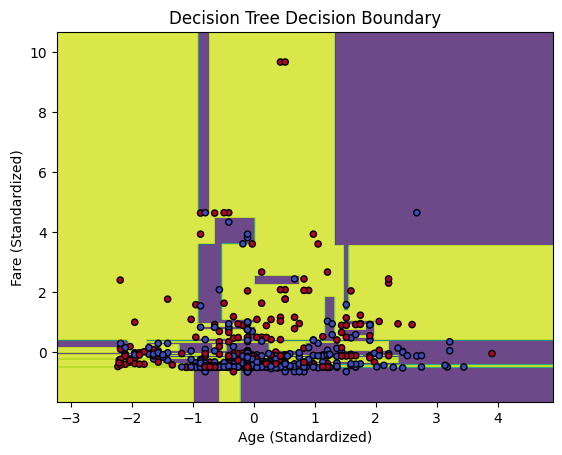

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Function to visualize decision boundaries
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict for the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create contour plot
    plt.contourf(xx, yy, Z, alpha=0.8)

    # Scatter plot for the original data
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20, cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('Age (Standardized)')
    plt.ylabel('Fare (Standardized)')
    plt.show()

# Choose two features: 'Age' and 'Fare' (already standardized)
X_plot = X_train[['Age', 'Fare']].values
y_plot = y_train.values

# Train the k-NN model on the two features
knn.fit(X_plot, y_train)
# Visualize k-NN decision boundary
plot_decision_boundary(knn, X_plot, y_plot, "k-NN Decision Boundary")

# Train the Decision Tree model on the two features
decision_tree.fit(X_plot, y_train)
# Visualize Decision Tree decision boundary
plot_decision_boundary(decision_tree, X_plot, y_plot, "Decision Tree Decision Boundary")


**Step 9: Performance visualization**

We will create a bar chart comparing performance metrics (accuracy, precision, recall, F1-score) of both models.

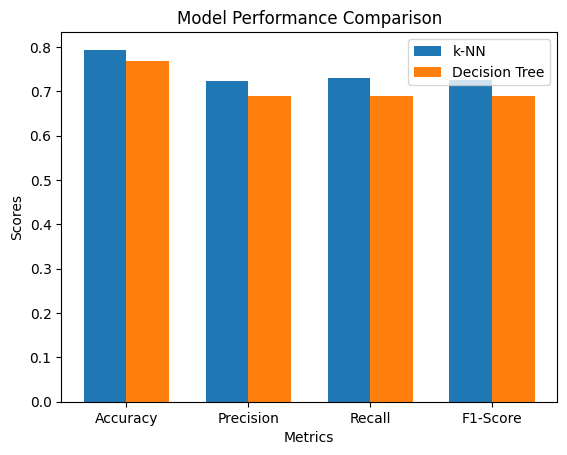

In [21]:
import numpy as np

# Performance metrics comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
knn_scores = [knn_accuracy, knn_precision, knn_recall, knn_f1]
tree_scores = [tree_accuracy, tree_precision, tree_recall, tree_f1]

bar_width = 0.35
index = np.arange(len(metrics))

plt.bar(index, knn_scores, bar_width, label='k-NN')
plt.bar(index + bar_width, tree_scores, bar_width, label='Decision Tree')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()
plt.show()
